# Shifted-tilted Tophat at Gaussian interference at waist

Applying first-order shift to tophat without tilt (just to see shifted tophat).

\begin{equation}
	u_{n,m} \rightarrow
     u_{n,m}
        \left[
        1 - \frac{2 a }{w(z)^2} x + i k \alpha x - i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    + 
	a \frac{2 \sqrt{n}}{w(z)} 
	\exp(i \Psi(z))
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}

Scatter these with

\begin{align*}
\sum_{n,m} u_{n,m} \rightarrow 
	\sum_{n,m} 
	\lbrace &
		u_{n+2,m}[ X_+^2(-i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n+1,m}[ X_+^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n,m} [1+X_+^1(ik\alpha \frac{2a\sqrt{n}}{w} e^{i\Psi})- X_0^2 (i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n-1,m} [\frac{2a\sqrt{n}}{w} e^{i\Psi} + X_-^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n-2,m} [ X_-^1(ik\alpha a\frac{2\sqrt{n}}{w}e^{i\Psi}) - X_-^2 (i\frac{2ka\alpha}{w^2})] 	
	\rbrace
\end{align*}

In [1]:
#pl has amp/phase/mode building, plplt has specialized plot fxns, th has tophat/HG00 integration
import PauLisa as pl, PL_Plot as plplt, Tophat_integration_AW as th,numpy as np, matplotlib.pyplot as plt, cmath as cm

from mpmath import quadgl
from numpy import pi as pi
import mpmath as mp
import scipy.io


inf=np.inf

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
coef=mat['coeftop'].ravel()

Using simtools mode indexing in Python:

$
m = \frac{(N+1)(N+2)}{2}- (A_{python} + 1)
$

$
\rightarrow A_{python} =  \frac{(N+1)(N+2)}{2} + 1 -m 
$

$
n = A_{python} - \frac{N(N+1)}{2} = N-m
$

$
\rightarrow A_{python} = N-m + - \frac{N(N+1)}{2} 
$

$
N = floor( \frac{\sqrt{8A_{python}+1} - 1}{2} ) = ceil(\frac{\sqrt{9+8A_{python}} - 3}{2} )
$

In [3]:
def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes



#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    
    

In [4]:
plane = pl.Plane(-2e-3, 2e-3, 300, -2e-3, 2e-3, 300)
params = pl.Params(1064e-9, 0.00023067,0)

modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)
modes18= pl.create_modes_order18(listModesM,listModesN,listModesC,NumberModes)
print(params)
print(plane)



wavelength=1.064e-06
w0=0.00023067
z0=0
Zr=0.15710516963503632
q0=0.15710516963503632j

xmin=-0.002,xmax=0.002,xpoints=300,x step size = 1.3333333333333333e-05
ymin=-0.002,ymax=0.002,ypoints=300,y step size = 1.3333333333333333e-05


In [20]:
a = 50e-6
alpha = 0
z=0.00023067

In [21]:
#Apply scatter to create new modes

sc_modes = pl.scatter_case2_first_order(z,params,a,alpha,modes)

In [22]:
f2 = pl.calculate(params,plane,sc_modes,z)

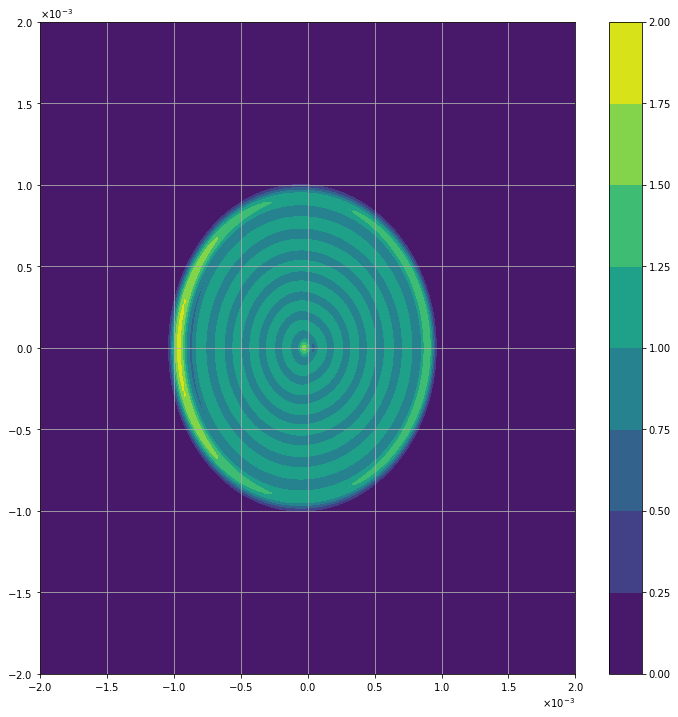

In [23]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

#plt.savefig("th_full_second_order.png")

(-0.0012, -0.001)

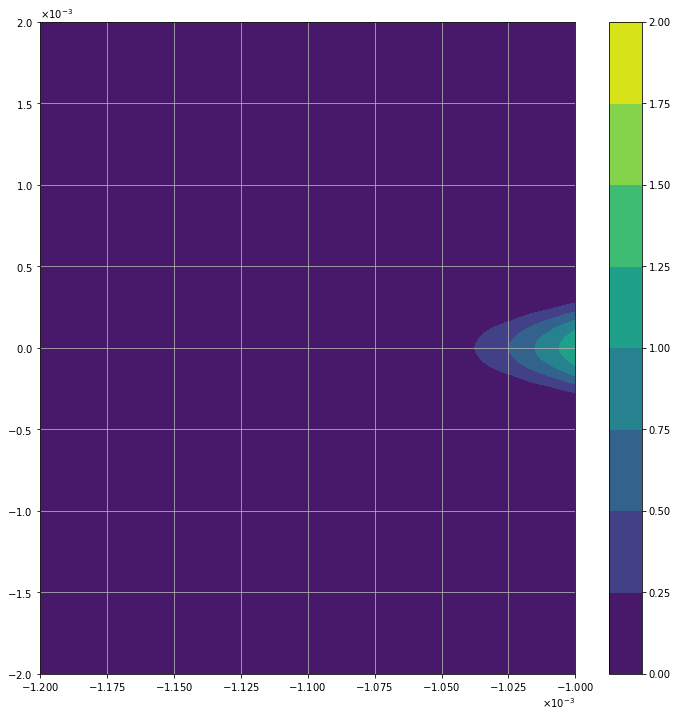

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()
plt.xlim([-1.2e-3,-1e-3])
#plt.savefig("th_zoom_second_order.png")

In [10]:
pl.show_modes(sc_modes)

n\m [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
0   [(0.0005782135489454484+0j), 0, (0.00040885861556282983+0j), 0, (0.0003540803162272261+0j), 0, (0.000323212982065895+0j), 0, (0.0003022158047268879+0j), 0, (0.0002860296460147838+0j), 0, (0.00027094445327376657+0j), 0, (0.0002512919866755189+0j), 0, (0.00021738092777959212+0j), 0, (0.00015798140510481738+0j), 0, (7.192607227785025e-05+0j), 0, (-1.6391805321537432e-05+0j), 0, (-6.0842902421992335e-05+0j), 0, (-3.51766787113729e-05+0j), 0, (2.2328640904269448e-05+0j), 0, (3.720198862288632e-05+0j), 0, (-4.422997044297867e-06+0j), 0, (-3.069071621773588e-05+0j), 0, 0]
1   [(-6.490791353697253e-12+7.36083005973227e-08j), 0, (-8.166565635745588e-11+5.204880185939952e-08j), 0, (-7.904745268790783e-10+4.507432018942838e-08j), 0, (-5.6659555495228566e-09+4.11376580094392e-08j), 0, (-3.095692004535417e-08+3.842752116765267e-08j), 0, (-1.3167674800883

In [11]:
pl.show_modes(modes)

n\m [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
0   [0.0005782135489454484, 0.0, 0.00040885861556282983, 0.0, 0.0003540803162272261, 0.0, 0.000323212982065895, 0.0, 0.0003022158047268879, 0.0, 0.0002860296460147838, 0.0, 0.00027094445327376657, 0.0, 0.0002512919866755189, 0.0, 0.00021738092777959212, 0.0, 0.00015798140510481738, 0.0, 7.192607227785025e-05, 0.0, -1.6391805321537432e-05, 0.0, -6.0842902421992335e-05, 0.0, -3.51766787113729e-05, 0.0, 2.2328640904269448e-05, 0.0, 3.720198862288632e-05, 0.0, -4.422997044297867e-06, 0.0, -3.069071621773588e-05]
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
2   [0.00040885861556282983, 0.0, 0.00028910536757333815, 0.0, 0.00025035969936384935, 0.0, 0.0002284536747373153, 0.0, 0.0002131939106897525, 0.0, 0.0002001057403562884, 0.